#  Text Classification

In [81]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from wordcloud import WordCloud

In [82]:
reviews_df = pd.read_csv('/content/reviews.csv')
reviews_df

,id,text
0,168,"Hi Leah, I ordered this early to give to a co-..."
1,26,"Good evening, \n I just received my order! I ..."
2,64,I couldn’t find where I could write a review b...
3,10,I received my order today and gave it to my si...
4,111,"﻿Max,\n\nWe received the heart but sadly are d..."
...,...,...
249,189,"Thank you, this is beautiful and they loved it."
250,72,Thanks so much. They lookgreat!
251,107,"Emily, \n THANK YOU so much for the new “bric..."
252,271,"Jacqueline, \n I just received the replaceme..."


In [83]:
labels_df = pd.read_csv('/content/labels.csv')
labels_df

,id,sentiment
0,168,Positive
1,26,Positive
2,64,Positive
3,10,Positive
4,111,Negative
...,...,...
249,189,Positive
250,72,Positive
251,107,Positive
252,271,Positive


In [84]:
labels_df.sentiment.value_counts()

,count
sentiment,
Positive,152
Negative,102


In [85]:
# Merge the two dataframes on the 'id' column to add the 'sentiment' as 'target' in reviews
reviews_df = reviews_df.merge(labels_df.rename(columns={'sentiment': 'target'}), on='id', how='left')
df = reviews_df.copy()


In [86]:
df

,id,text,target
0,168,"Hi Leah, I ordered this early to give to a co-...",Positive
1,26,"Good evening, \n I just received my order! I ...",Positive
2,64,I couldn’t find where I could write a review b...,Positive
3,10,I received my order today and gave it to my si...,Positive
4,111,"﻿Max,\n\nWe received the heart but sadly are d...",Negative
...,...,...,...
249,189,"Thank you, this is beautiful and they loved it.",Positive
250,72,Thanks so much. They lookgreat!,Positive
251,107,"Emily, \n THANK YOU so much for the new “bric...",Positive
252,271,"Jacqueline, \n I just received the replaceme...",Positive


In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254 entries, 0 to 253
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      254 non-null    int64 
 1   text    254 non-null    object
 2   target  254 non-null    object
dtypes: int64(1), object(2)
memory usage: 6.1+ KB


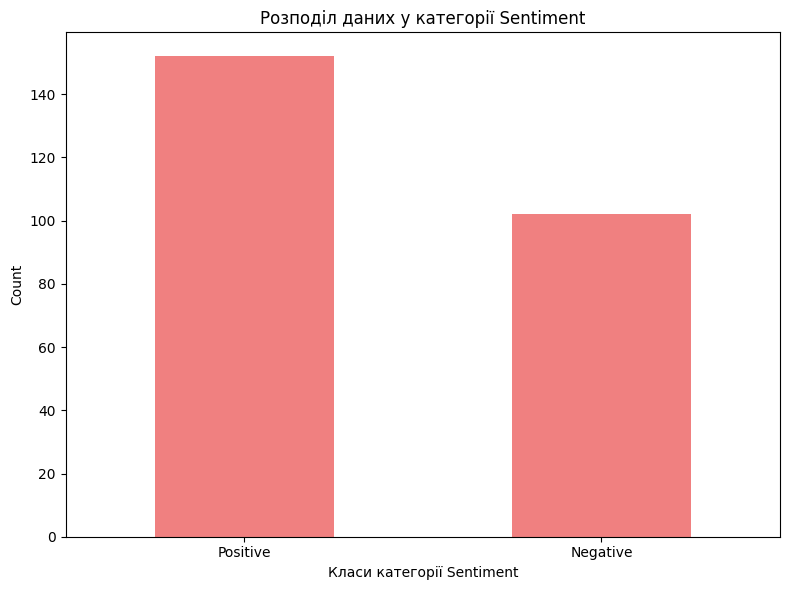

In [88]:
# Зобразимо стовпчикову діаграму для класів категорії sentiment
plt.figure(figsize=(8, 6))
df['target'].value_counts().plot(kind='bar', color='lightcoral')
plt.title('Розподіл даних у категорії Sentiment')
plt.ylabel('Count')
plt.xlabel('Класи категорії Sentiment')
plt.xticks(rotation=0)
plt.tight_layout()

# Покажемо графік
plt.show()

#Visualization

In [89]:
from collections import Counter
Counter( df['target'])


Counter({'Positive': 152, 'Negative': 102})

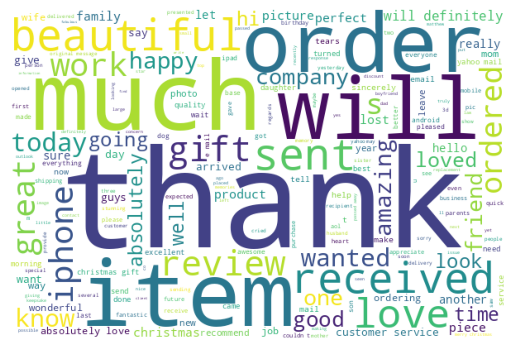

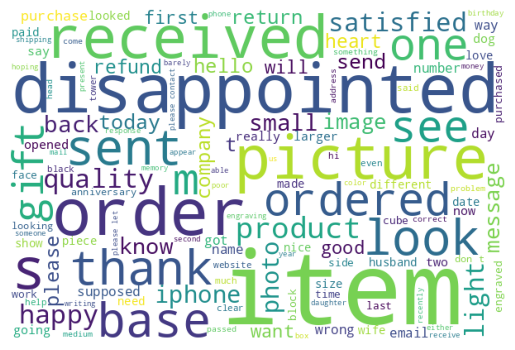

In [90]:
from wordcloud import WordCloud

def visualize(label):
    text = ''
    for msg in df[df['target'] == label]['text']:
        msg = msg.lower()
        text += msg + ' '
    wordcloud = WordCloud(width=600, height=400, background_color="white").generate(text)
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

visualize('Positive')
visualize('Negative')

#Vectorization

In [91]:
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import TfidfVectorizer

# Ініціалізація TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')

# Перетворимо стовпець 'text' на матрицю TF-IDF
X = vectorizer.fit_transform(df['text'])

# Виведемо розмір отриманої матриці, щоб побачити кількість текстів та кількість обраних фіч
X.shape

(254, 1908)


#Text Classification

In [92]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns


In [93]:
# Розділимо дані на тренувальний та тестовий набори
y = df['target'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, stratify=y, random_state=42)

In [94]:
def plot_confusion_matrix(y_true, y_pred, title='Confusion Matrix', plot_cm=True):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm', cbar=False)
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title(title)
    plt.show()

def train_and_evaluate_model(model, X_train, X_test, y_train, y_test, model_name, plot_cm=True):
    # Навчання моделі
    model.fit(X_train, y_train)

    # Передбачення на тестових даних
    y_pred = model.predict(X_test)

    # Оцінка моделі
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{model_name} accuracy score: {accuracy:.3f}")
    report = classification_report(y_test, y_pred)
    print(report)

    # Побудова матриці плутанини
    plot_confusion_matrix(y_test, y_pred, title=f'Confusion Matrix for {model_name}')

    return model, y_pred

#Logistic Regression

Logistic Regression accuracy score: 0.808
              precision    recall  f1-score   support

    Negative       0.86      0.60      0.71        10
    Positive       0.79      0.94      0.86        16

    accuracy                           0.81        26
   macro avg       0.82      0.77      0.78        26
weighted avg       0.82      0.81      0.80        26



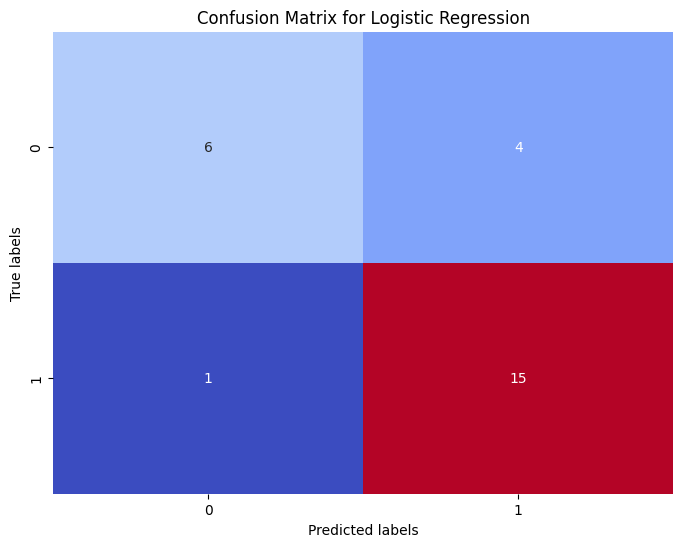

(LogisticRegression(max_iter=1000, random_state=42),
 array(['Positive', 'Positive', 'Positive', 'Positive', 'Negative',
        'Positive', 'Negative', 'Positive', 'Positive', 'Negative',
        'Positive', 'Positive', 'Negative', 'Positive', 'Positive',
        'Positive', 'Positive', 'Positive', 'Positive', 'Positive',
        'Negative', 'Positive', 'Negative', 'Positive', 'Negative',
        'Positive'], dtype=object))

In [112]:
lr_model = LogisticRegression(max_iter=1000, random_state=42)
train_and_evaluate_model(model=lr_model, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test, model_name='Logistic Regression')

#Decision Tree

Decision Tree accuracy score: 1.000
              precision    recall  f1-score   support

    Negative       1.00      1.00      1.00        10
    Positive       1.00      1.00      1.00        16

    accuracy                           1.00        26
   macro avg       1.00      1.00      1.00        26
weighted avg       1.00      1.00      1.00        26



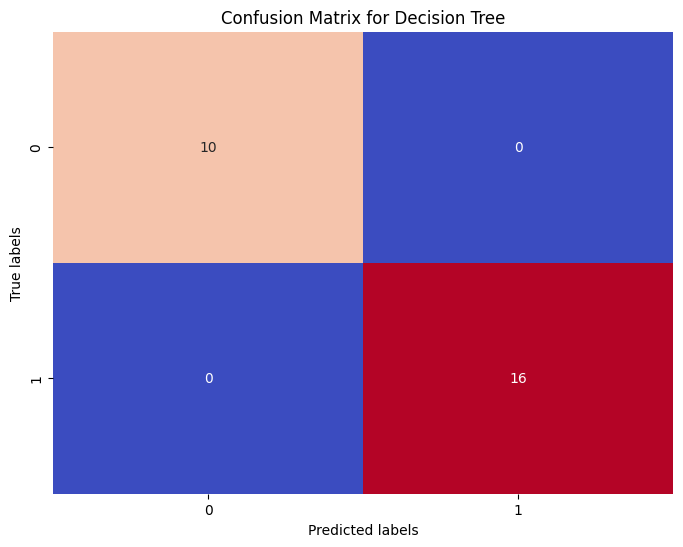

(DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42),
 array(['Positive', 'Positive', 'Negative', 'Positive', 'Negative',
        'Negative', 'Positive', 'Negative', 'Positive', 'Negative',
        'Positive', 'Positive', 'Negative', 'Positive', 'Positive',
        'Positive', 'Positive', 'Negative', 'Positive', 'Positive',
        'Negative', 'Positive', 'Negative', 'Positive', 'Negative',
        'Positive'], dtype=object))

In [113]:
dt_model = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)
train_and_evaluate_model(model=dt_model, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test, model_name='Decision Tree')

#Random Forest

Random Forest accuracy score: 0.808
              precision    recall  f1-score   support

    Negative       1.00      0.50      0.67        10
    Positive       0.76      1.00      0.86        16

    accuracy                           0.81        26
   macro avg       0.88      0.75      0.77        26
weighted avg       0.85      0.81      0.79        26



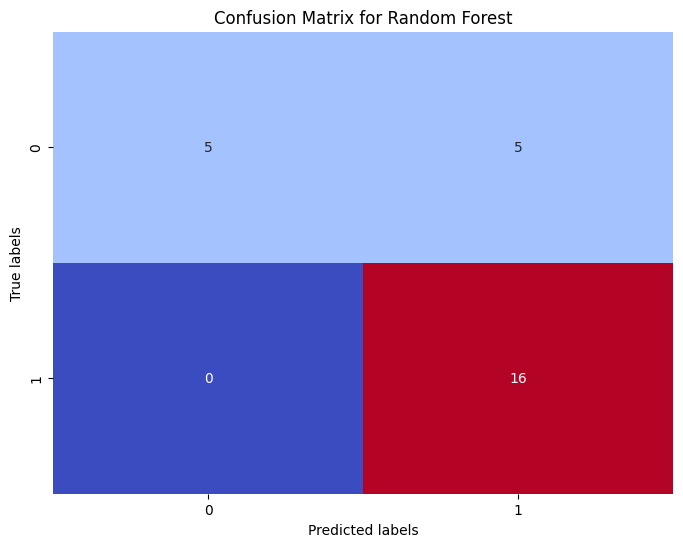

(RandomForestClassifier(criterion='entropy', max_depth=5, random_state=42),
 array(['Positive', 'Positive', 'Negative', 'Positive', 'Negative',
        'Positive', 'Positive', 'Positive', 'Positive', 'Positive',
        'Positive', 'Positive', 'Negative', 'Positive', 'Positive',
        'Positive', 'Positive', 'Positive', 'Positive', 'Positive',
        'Negative', 'Positive', 'Positive', 'Positive', 'Negative',
        'Positive'], dtype=object))

In [114]:
rf_model = RandomForestClassifier(criterion='entropy', max_depth=5, random_state=42)
train_and_evaluate_model(model=rf_model, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test, model_name='Random Forest')

#AdaBoost

AdaBoost accuracy score: 1.000
              precision    recall  f1-score   support

    Negative       1.00      1.00      1.00        10
    Positive       1.00      1.00      1.00        16

    accuracy                           1.00        26
   macro avg       1.00      1.00      1.00        26
weighted avg       1.00      1.00      1.00        26



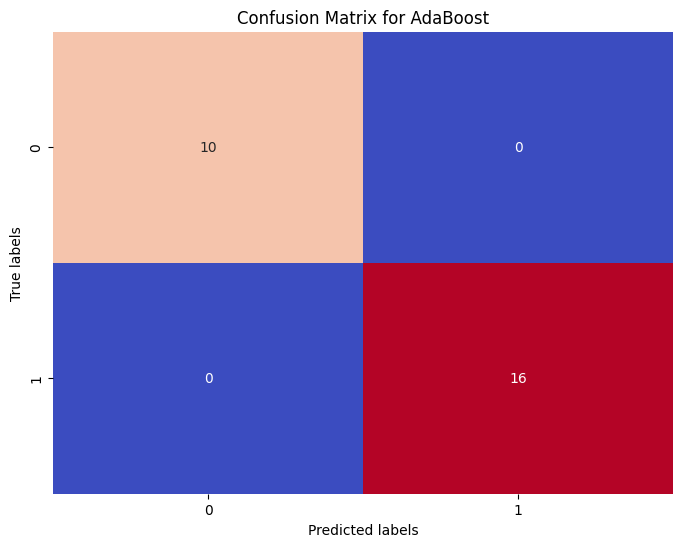

(AdaBoostClassifier(n_estimators=100, random_state=42),
 array(['Positive', 'Positive', 'Negative', 'Positive', 'Negative',
        'Negative', 'Positive', 'Negative', 'Positive', 'Negative',
        'Positive', 'Positive', 'Negative', 'Positive', 'Positive',
        'Positive', 'Positive', 'Negative', 'Positive', 'Positive',
        'Negative', 'Positive', 'Negative', 'Positive', 'Negative',
        'Positive'], dtype=object))

In [117]:
ab_model = AdaBoostClassifier(n_estimators=100, random_state=42)
train_and_evaluate_model(model=ab_model, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test, model_name='AdaBoost')

#SVM

SVM accuracy score: 0.846
              precision    recall  f1-score   support

    Negative       0.88      0.70      0.78        10
    Positive       0.83      0.94      0.88        16

    accuracy                           0.85        26
   macro avg       0.85      0.82      0.83        26
weighted avg       0.85      0.85      0.84        26



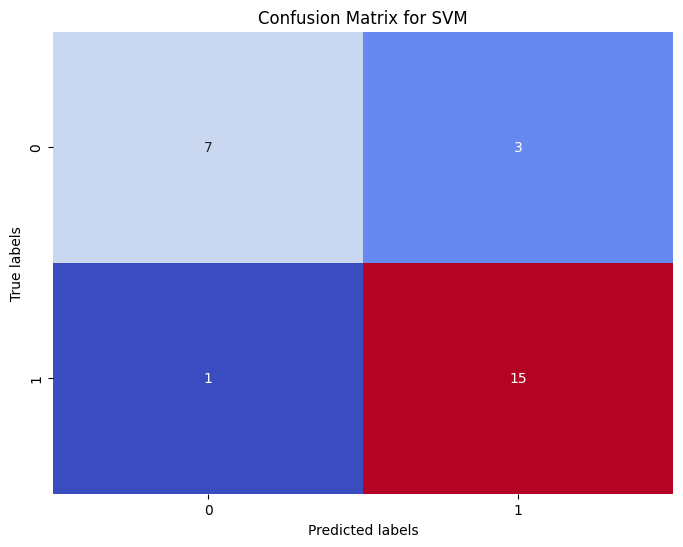

(SVC(C=1, gamma=0.1, kernel='linear', random_state=42),
 array(['Positive', 'Positive', 'Negative', 'Positive', 'Negative',
        'Positive', 'Negative', 'Positive', 'Positive', 'Negative',
        'Positive', 'Positive', 'Negative', 'Positive', 'Positive',
        'Positive', 'Positive', 'Positive', 'Positive', 'Positive',
        'Negative', 'Positive', 'Negative', 'Positive', 'Negative',
        'Positive'], dtype=object))

In [118]:
svm_model = SVC(kernel='linear', C=1, gamma=0.1, random_state=42)
train_and_evaluate_model(model=svm_model, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test, model_name='SVM')

#kNN

kNN accuracy score: 0.808
              precision    recall  f1-score   support

    Negative       0.78      0.70      0.74        10
    Positive       0.82      0.88      0.85        16

    accuracy                           0.81        26
   macro avg       0.80      0.79      0.79        26
weighted avg       0.81      0.81      0.81        26



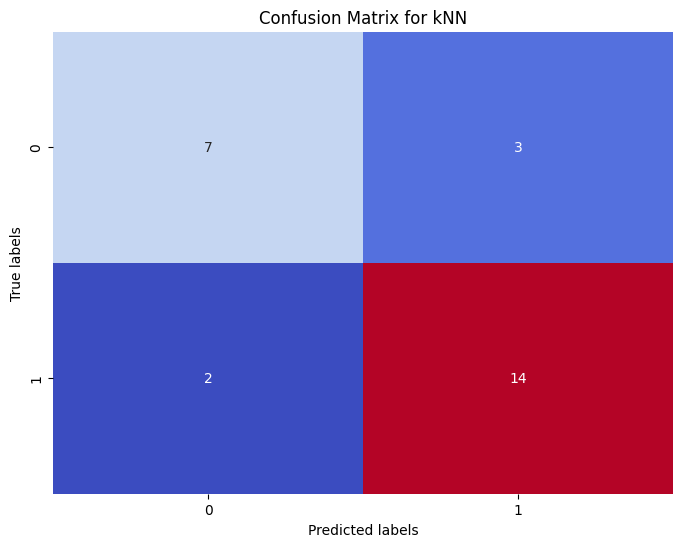

(KNeighborsClassifier(metric='cosine'),
 array(['Positive', 'Positive', 'Negative', 'Positive', 'Negative',
        'Positive', 'Negative', 'Positive', 'Positive', 'Negative',
        'Positive', 'Positive', 'Negative', 'Negative', 'Positive',
        'Positive', 'Positive', 'Positive', 'Positive', 'Positive',
        'Negative', 'Positive', 'Negative', 'Positive', 'Negative',
        'Positive'], dtype=object))

In [119]:
knn_model = KNeighborsClassifier(n_neighbors=5, metric='cosine')
train_and_evaluate_model(knn_model, X_train, X_test, y_train, y_test, 'kNN')

#Multinomial Naive Bayes

Multinomial Naive Bayes accuracy score: 0.769
              precision    recall  f1-score   support

    Negative       0.83      0.50      0.62        10
    Positive       0.75      0.94      0.83        16

    accuracy                           0.77        26
   macro avg       0.79      0.72      0.73        26
weighted avg       0.78      0.77      0.75        26



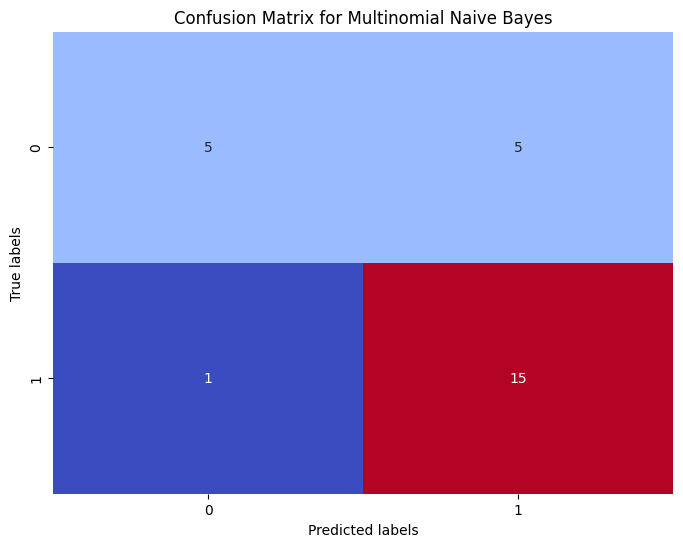

(MultinomialNB(alpha=1),
 array(['Positive', 'Positive', 'Positive', 'Positive', 'Positive',
        'Positive', 'Negative', 'Positive', 'Positive', 'Negative',
        'Positive', 'Positive', 'Negative', 'Positive', 'Positive',
        'Positive', 'Positive', 'Positive', 'Positive', 'Positive',
        'Negative', 'Positive', 'Negative', 'Positive', 'Negative',
        'Positive'], dtype='<U8'))

In [120]:
nb_model = MultinomialNB(alpha=1, fit_prior=True)
train_and_evaluate_model(model=nb_model, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test, model_name='Multinomial Naive Bayes')

#Conclusions

In [126]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from IPython.display import display

# Словник для зберігання результатів
results = []

def train_and_evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    # Навчання моделі
    model.fit(X_train, y_train)
    # Прогнозування
    y_pred = model.predict(X_test)
    # Розрахунок метрик
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Додатково: AUC (для бінарних задач)
    auc = None
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)[:, 1]
        auc = roc_auc_score(y_test, y_prob)

    # Зберігаємо результати
    results.append({
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-score': f1,
        'AUC': auc
    })

# Порівняння моделей
train_and_evaluate_model(lr_model, X_train, X_test, y_train, y_test, 'Logistic Regression')
train_and_evaluate_model(dt_model, X_train, X_test, y_train, y_test, 'Decision Tree')
train_and_evaluate_model(rf_model, X_train, X_test, y_train, y_test, 'Random Forest')
train_and_evaluate_model(ab_model, X_train, X_test, y_train, y_test, 'AdaBoost')
train_and_evaluate_model(svm_model, X_train, X_test, y_train, y_test, 'SVM')
train_and_evaluate_model(knn_model, X_train, X_test, y_train, y_test, 'kNN')
train_and_evaluate_model(nb_model, X_train, X_test, y_train, y_test, 'Multinomial Naive Bayes')

# Вивід результатів
results_df = pd.DataFrame(results)
display(results_df)

,Model,Accuracy,Precision,Recall,F1-score,AUC
0,Logistic Regression,0.807692,0.815500,0.807692,0.798966,0.94375
1,Decision Tree,1.000000,1.000000,1.000000,1.000000,1.00000
2,Random Forest,0.807692,0.853480,0.807692,0.788635,0.98125
3,AdaBoost,1.000000,1.000000,1.000000,1.000000,1.00000
4,SVM,0.846154,0.849359,0.846154,0.842132,NaN
5,kNN,0.807692,0.805933,0.807692,0.805545,0.84375
6,Multinomial Naive Bayes,0.769231,0.782051,0.769231,0.753205,0.91250


In [128]:
#results_df_sorted = results_df.sort_values(by='Accuracy', ascending=False)
#display(results_df_sorted)

sorted_results_df = pd.DataFrame(results).sort_values(by='Accuracy', ascending=False)
# Keep only 'Model' and 'Accuracy' columns
sorted_results_df = sorted_results_df[['Model', 'Accuracy']]
sorted_results_df

,Model,Accuracy
1,Decision Tree,1.000000
3,AdaBoost,1.000000
4,SVM,0.846154
2,Random Forest,0.807692
0,Logistic Regression,0.807692
5,kNN,0.807692
6,Multinomial Naive Bayes,0.769231
